In [1]:
#test avec prophet

In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [3]:
import pandas_bokeh
pandas_bokeh.output_notebook()
pd.set_option("plotting.backend", "pandas_bokeh")

Loading BokehJS ...

In [4]:
uber = pd.read_csv('../uber_data.csv', parse_dates = ['pickup_dt'])

In [5]:
man = uber[uber['borough'] == 'Manhattan']

In [10]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting.forecasting import plot_ys

man = man.reset_index(drop = True)

train, test = temporal_train_test_split(man, test_size=720)


In [11]:
train = train[['pickup_dt', 'pickups']]
train

,pickup_dt,pickups
0,2015-01-01 01:00:00,5258
1,2015-01-01 02:00:00,4345
2,2015-01-01 03:00:00,4577
3,2015-01-01 04:00:00,3003
4,2015-01-01 05:00:00,1313
...,...,...
3618,2015-05-31 19:00:00,4944
3619,2015-05-31 20:00:00,4100
3620,2015-05-31 21:00:00,3639
3621,2015-05-31 22:00:00,2848


In [24]:
test = test[['pickup_dt', 'pickups']]
test

,pickup_dt,pickups
3623,2015-06-01 00:00:00,1301
3624,2015-06-01 01:00:00,704
3625,2015-06-01 02:00:00,488
3626,2015-06-01 03:00:00,349
3627,2015-06-01 04:00:00,453
...,...,...
4338,2015-06-30 19:00:00,4585
4339,2015-06-30 20:00:00,4210
4340,2015-06-30 21:00:00,4313
4341,2015-06-30 22:00:00,4452


In [14]:
train.columns = ['ds', 'y']

In [165]:
train

,ds,y
0,2015-01-01 01:00:00,5258
1,2015-01-01 02:00:00,4345
2,2015-01-01 03:00:00,4577
3,2015-01-01 04:00:00,3003
4,2015-01-01 05:00:00,1313
...,...,...
3618,2015-05-31 19:00:00,4944
3619,2015-05-31 20:00:00,4100
3620,2015-05-31 21:00:00,3639
3621,2015-05-31 22:00:00,2848


In [154]:
model = Prophet()
model.add_country_holidays(country_name='US')
model.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [155]:
future = model.make_future_dataframe(periods = len(test), freq='H')
len(future)

4343

In [166]:
future

,ds
0,2015-01-01 01:00:00
1,2015-01-01 02:00:00
2,2015-01-01 03:00:00
3,2015-01-01 04:00:00
4,2015-01-01 05:00:00
...,...
4338,2015-06-30 19:00:00
4339,2015-06-30 20:00:00
4340,2015-06-30 21:00:00
4341,2015-06-30 22:00:00


In [167]:
future.to_csv('../X_test_prophet.csv')

In [156]:
forecast = model.predict(future)


In [157]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].iloc[3623:3627]

,ds,yhat,yhat_lower,yhat_upper
3623,2015-06-01 00:00:00,2245.770555,1303.961625,3223.423541
3624,2015-06-01 01:00:00,1570.087562,619.157677,2552.542074
3625,2015-06-01 02:00:00,891.683680,-84.391146,1919.315962
3626,2015-06-01 03:00:00,340.900172,-651.523629,1345.578035


In [158]:
test

,pickup_dt,pickups
3623,2015-06-01 00:00:00,1301
3624,2015-06-01 01:00:00,704
3625,2015-06-01 02:00:00,488
3626,2015-06-01 03:00:00,349
3627,2015-06-01 04:00:00,453
...,...,...
4338,2015-06-30 19:00:00,4585
4339,2015-06-30 20:00:00,4210
4340,2015-06-30 21:00:00,4313
4341,2015-06-30 22:00:00,4452


In [168]:
test.to_csv('../y_test_prophet.csv', index=False)

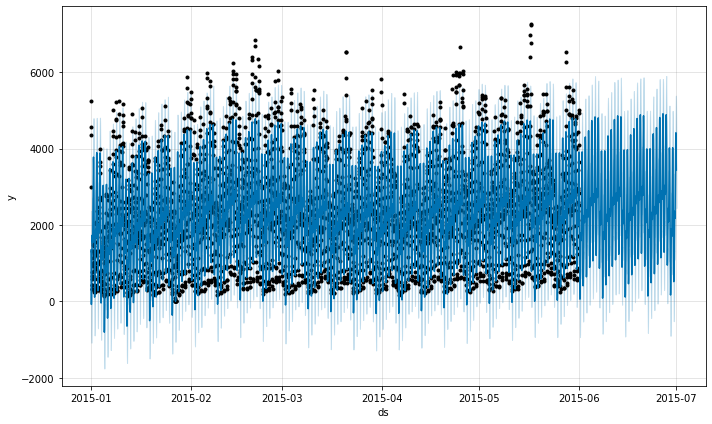

In [159]:
fig = model.plot(forecast)

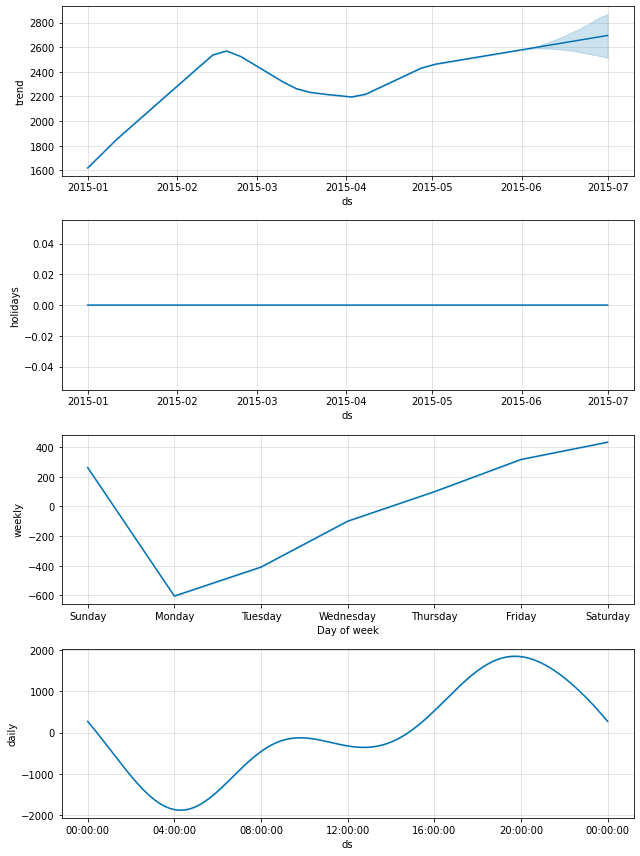

In [160]:
fig = model.plot_components(forecast)

In [161]:
def smape_perso(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [162]:
smape_perso(test['pickups'],forecast['yhat'])

27.699260764244276

In [172]:
forecast['yhat'][-720:]

3623    2245.770555
3624    1570.087562
3625     891.683680
3626     340.900172
3627      60.391515
           ...     
4338    4355.827426
4339    4414.824079
4340    4250.774540
4341    3911.566321
4342    3442.322820
Name: yhat, Length: 720, dtype: float64

In [108]:
tp = np.array(test['pickups'])
test_df = pd.Series(tp, index = test['pickup_dt'])
test_df.index = pd.to_datetime(test_df.index)
test_df

pickup_dt
2015-06-01 00:00:00    1301
2015-06-01 01:00:00     704
2015-06-01 02:00:00     488
2015-06-01 03:00:00     349
2015-06-01 04:00:00     453
                       ... 
2015-06-30 19:00:00    4585
2015-06-30 20:00:00    4210
2015-06-30 21:00:00    4313
2015-06-30 22:00:00    4452
2015-06-30 23:00:00    3828
Length: 720, dtype: int64

In [78]:
f = forecast[-720:]
fp = np.array(f['yhat'])

forecast_df = pd.Series(fp, index = f['ds'])
forecast_df.index = pd.to_datetime(forecast_df.index)
forecast_df

ds
2015-06-01 00:00:00    2264.802563
2015-06-01 01:00:00    1591.431976
2015-06-01 02:00:00     915.244677
2015-06-01 03:00:00     366.622301
2015-06-01 04:00:00      88.211611
                          ...     
2015-06-30 19:00:00    4298.480737
2015-06-30 20:00:00    4361.082928
2015-06-30 21:00:00    4200.640537
2015-06-30 22:00:00    3865.002869
2015-06-30 23:00:00    3399.241830
Length: 720, dtype: float64

In [79]:
pd.concat([test_df,forecast_df], axis=1).plot()

Figure(id='1332', ...)

In [163]:
import pickle

pickle.dump(model, open('model_prophet.pkl','wb'))